# Load libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import stuff for sentiment analyzation
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kreilgaard/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Load Preprocessed Data

In [2]:
df = pd.read_csv('parsed_data.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean tweet,stemmed tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,exclamationmark mentionhere woman complain cle...,exclamationmark mentionhere woman complain cle...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,exclamationmark mentionhere boy dats cold tyga...,exclamationmark mentionhere boy dat cold tyga ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,exclamationmark mentionhere dawg exclamationma...,exclamationmark mentionhere dawg exclamationma...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,exclamationmark mentionhere mentionhere look l...,exclamationmark mentionhere mentionhere look l...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,exclamationmark mentionhere shit hear might tr...,exclamationmark mentionhere shit hear might tr...
...,...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthaf lie emoticonhere mentionhere menti...,yous muthaf lie emoticonhere mentionhere menti...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy,go broke wrong heart baby drove redneck crazy
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat exclamationmark dat niggu...,young buck wanna eat exclamationmark dat niggu...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,youu get wild bitch tellin lie


# Sentiment Scores with VADER
Sentiment analysis description:
https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [3]:
# Initialise the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Get polarity compound scores (returns a score for negative, neutral, positive and a compound score)
# COMPOUND: -1(most extreme negative) and +1 (most extreme positive)

# Empty array to store sentiment score
sentiment_scores = []

# Loop over tweets
for i in range(len(df)):
    
    # Compute score
    score = sid.polarity_scores(df['stemmed tweet'][i])['compound']
    
    # Append score
    sentiment_scores.append(score)

# Add column to dataframe
df['sentiment score'] = sentiment_scores

In [4]:
# Count tweets with negative sentiments 
N_neg = np.sum(df['sentiment score'] < 0)

# and positive sentiments
N_pos = np.sum(df['sentiment score'] > 0)

# and neutral
N_neu = np.sum(df['sentiment score'] == 0)

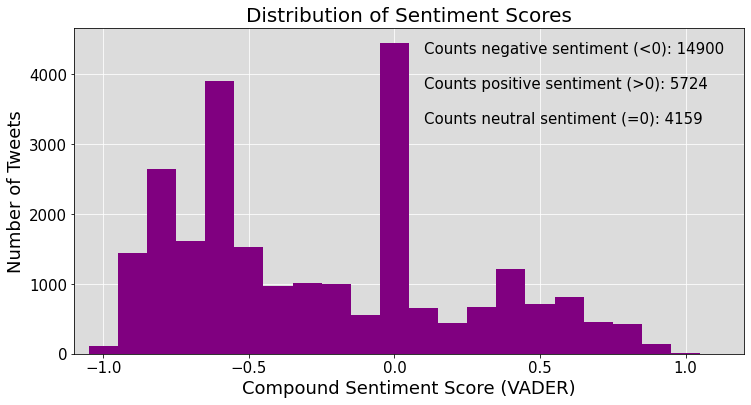

In [5]:
# Visualise the sentiment scores
fig, ax = plt.subplots(figsize=(12,6))

# Plot scores
ax.hist(df['sentiment score'], bins=np.arange(-1.05,1.1,0.1), color='purple', zorder=2)

# Mark counts in each group
ax.text(0.1, 4300, f'Counts negative sentiment (<0): {N_neg}', fontsize=15)
ax.text(0.1, 3800, f'Counts positive sentiment (>0): {N_pos}', fontsize=15)
ax.text(0.1, 3300, f'Counts neutral sentiment (=0): {N_neu}', fontsize=15)

# Make pretty
ax.set_facecolor('gainsboro')
ax.grid(color='white')
ax.set_title('Distribution of Sentiment Scores', fontsize=20)
ax.set_xlabel('Compound Sentiment Score (VADER)', fontsize=18)
ax.set_ylabel('Number of Tweets', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1.1,1.2)

plt.show()

<span style="color:red"> THIS PLOT SHOULD BE MADE FOR ALL DATA AND AFTERWARDS FOR THE DOWNSAMPLED DATA (WHERE THERE ARE THE SAME NUMBER OF TWEETS IN EACH CATEGORY). MAYBE ALSO COMPARE FOR TRAIN AND TEST AND MAKE SURE IT IS THE SAME ISH? </span>.

# Readability Scores 
There are different ways to asses the readability, some are outlined here:
https://www.geeksforgeeks.org/readability-index-pythonnlp/
and here:
https://www.tutorialspoint.com/readability-index-in-python-nlp

Article describing a modified Flesch reading ease score suitable for twitter. It is described under "Measuring Reading Ease" here:
https://arxiv.org/pdf/1401.6058.pdf
Due to the short format of tweets. Each tweet is treated as one sentence. The Flesch formula is used since it does not depend on a large segment of text, but only depends primarily on word and sentence length. This produces values nominally in the range [0,122], with higher RE scores indicating greater ease in readability, and lower scores indicating difficult or complex writing. Values below this range are also possible for very complex texts.

Flesch reading ease: FRE

Because tweets are inherently short and punctuation is often unconventional, we treat each tweet as having a single sentence. We followed standard conventions to define syllables within words: split words on vowels, pairs of vowels count as a single split. For words ending in –e (except those ending with –le), –es, or –ed, we subtracted a syllable. Any words that started with “http” or “@” were removed, thus excluding hyperlinks and usernames from the calculation. Tweets with a null score (e.g. those only containing a hyperlink) were discarded. We calculated our RE metric both with and without words that started with “#”, colloquially known as “hashtags”. We discuss their effect on the readability later on.

Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW) <br>
Here,
ASL = average sentence length (number of words divided by number of sentences)
ASW = average word length in syllables (number of syllables divided by number of words)

In [6]:
# Define helper function to count syllables
def count_syllables(word):
    
    # We start by setting the number to zero and add each time we encounter a syllable
    syllables = 0
        
    # Define wovels (yes we don't consider y here, sorry)
    wovels = ['a', 'e', 'i', 'o', 'u']
        
    # Check if the first letter is a wovel
    if word[0] in wovels:
        syllables += 1
        
    # Check if the remainder of the words has a wovel appearing after a consonant
    for i in range(1,len(word)):
        if word[i] in wovels and word[i-1] not in wovels:
            syllables += 1
    
    # Handle *some* exceptions, there are many exceptions and for this purpose 
    #we only need to consider the most abundant ones
    for ending in ['es', 'ed', 'e']:
        if word.endswith(ending):
            syllables -= 1
    
    if len(word) >= 3 and word.endswith('le') and word[-3] not in wovels:
        syllables -= 1
        
    if len(word) >= 4 and word.endswith('les') and word[-4] not in wovels:
        syllables -= 1
    
    return syllables

In [7]:
# Define function that returns FRE for a tweet
def Flesch_score(string):
    """Should be used on the stemmed, cleaned tweets"""
    
    # Extract words from tweet
    words = string.split()
    
    # Remove words that are not actually words
    not_words = ['exclamationmark', 'questionmark', 'mentionhere', 'urlhere', 'emoticonhere']
    words = [w for w in words if w not in not_words]
    
    # Get number of words = average sentence length, since we set N_sentences=1
    ASL = len(words)
    
    # Get average word length ASW -------------
    
    # Array to store word lengths in syllables
    syllables_arr = np.zeros(ASL)
    
    # Loop over words in tweet
    for i in range(ASL):
        syllables_arr[i] = count_syllables(words[i])
            
    # Get ASW
    ASW = np.mean(syllables_arr)
    # -----------------------------------------
    
    # Compute Flesch reading ease score
    FRE = 206.835 - (1.015 * ASL) - (84.6 * ASW)

    return FRE

In [8]:
# Empty array to store FRE score
FRE_scores = []

# Loop over tweets
for i in range(len(df)):
    
    # Compute score
    score = Flesch_score(df['stemmed tweet'][i])
    
    # Append score
    FRE_scores.append(score)

# Add column to dataframe
df['FRE score'] = FRE_scores

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


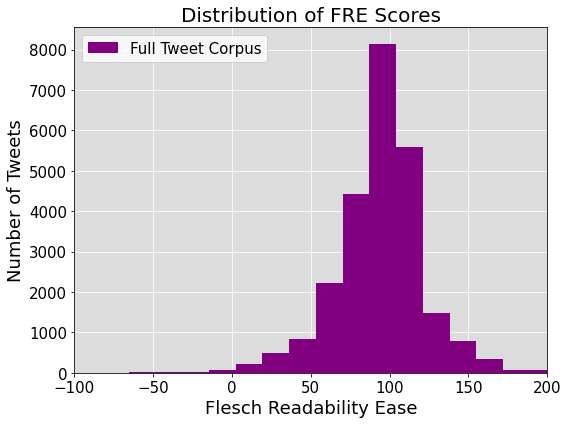

In [16]:
# Visualise the sentiment scores
fig, ax = plt.subplots(figsize=(8,6))

# Plot scores
ax.hist(df['FRE score'], color='purple', bins=25, zorder=2, label='Full Tweet Corpus')

# Make pretty
ax.legend(prop={'size':15})
ax.set_facecolor('gainsboro')
ax.grid(color='white')
ax.set_title('Distribution of FRE Scores', fontsize=20)
ax.set_xlabel('Flesch Readability Ease', fontsize=18)
ax.set_ylabel('Number of Tweets', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-100,200)
plt.tight_layout()
plt.savefig('Plots/FRE_scores.pdf')

plt.show()

In [10]:
nan_mask = df['FRE score'].isna()

# Export Data to File

In [11]:
# Export data
df.to_csv('parsed_data_with_features.csv', index=False)